# Team ID: 19

# Mohamed Magdy Mostafa &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;18P5160
# Khaled Medhat Mahmoud &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;18P3557

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest, chi2
import warnings
warnings.filterwarnings('ignore')


### Reading data

In [2]:
raw = pd.read_csv("data.csv")
raw.head()

,Unnamed: 0,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0
2,2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0
3,3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0
4,4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0


# Investigating data

In [3]:
raw.drop("Unnamed: 0",axis = 1, inplace=True)

In [4]:
raw.shape

(863, 14)

In [5]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 863 entries, 0 to 862
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   location      863 non-null    int64  
 1   country       863 non-null    int64  
 2   gender        863 non-null    int64  
 3   age           863 non-null    float64
 4   vis_wuhan     863 non-null    int64  
 5   from_wuhan    863 non-null    int64  
 6   symptom1      863 non-null    int64  
 7   symptom2      863 non-null    int64  
 8   symptom3      863 non-null    int64  
 9   symptom4      863 non-null    int64  
 10  symptom5      863 non-null    int64  
 11  symptom6      863 non-null    int64  
 12  diff_sym_hos  863 non-null    int64  
 13  result        863 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 94.5 KB


In [6]:
raw.describe()

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
count,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.00000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000
mean,76.645423,16.995365,0.849363,49.400000,0.181924,0.107764,12.13905,28.002317,18.298957,11.840093,2.993048,0.998841,0.995365,0.125145
std,39.200264,7.809951,0.726062,15.079203,0.386005,0.310261,3.99787,7.473231,2.864064,1.183771,0.127251,0.034040,2.358767,0.331075
min,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.000000,0.000000
25%,45.000000,11.000000,0.000000,40.000000,0.000000,0.000000,14.00000,31.000000,19.000000,12.000000,3.000000,1.000000,0.000000,0.000000
50%,87.000000,18.000000,1.000000,49.400000,0.000000,0.000000,14.00000,31.000000,19.000000,12.000000,3.000000,1.000000,0.000000,0.000000
75%,110.000000,24.000000,1.000000,57.000000,0.000000,0.000000,14.00000,31.000000,19.000000,12.000000,3.000000,1.000000,1.000000,0.000000
max,138.000000,33.000000,2.000000,96.000000,1.000000,1.000000,24.00000,31.000000,19.000000,12.000000,3.000000,1.000000,15.000000,1.000000


In [7]:
featureList = ['location','country','symptom1','symptom2','symptom3','symptom4','symptom5','symptom6','diff_sym_hos']
for i in featureList:
    print(f"{i} \t {raw[i].nunique()}")

location 	 139
country 	 34
symptom1 	 25
symptom2 	 32
symptom3 	 20
symptom4 	 13
symptom5 	 4
symptom6 	 2
diff_sym_hos 	 18


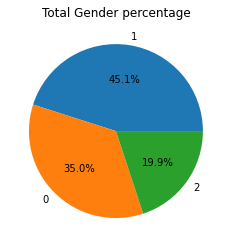

In [8]:
gender = raw['gender'].value_counts()
gender.plot.pie(title ='Total Gender percentage', ylabel='', autopct='%1.1f%%');

In [9]:
raw[raw.diff_sym_hos < 0]

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
223,56,18,1,35.0,0,0,6,31,19,12,3,1,-1,0
240,128,18,1,65.0,0,0,6,31,19,12,3,1,-5,0


### Dropping the two rows where diff_sym_hos is negative

In [10]:
raw.drop(240,axis = 0, inplace=True)
raw.drop(223,axis = 0, inplace=True)

### By observing this sample, we noticed that each country has a specific location

In [11]:
gender_showed = raw.groupby(["location","country"]).gender.count()
gender_showed.head(50)

location  country
0         0           1
1         18          7
2         14          1
3         1           1
4         11          1
5         25          8
6         11          4
7         15          1
8         32          1
9         12         11
10        4          17
11        25          3
12        12         15
13        8          18
14        5           1
15        27          1
16        11          1
17        11          1
18        11          1
19        32         11
20        25          1
21        25          2
22        18         10
23        8           1
24        9           1
25        11          4
26        13          1
27        11          6
28        12          2
29        8           1
30        18          2
31        8           3
32        18          2
33        8           5
34        15          2
35        8           3
36        12          1
37        18          1
38        33          2
39        8           1
40        8           

In [12]:
df = raw.copy()
df.head()

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0
2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0
3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0
4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0


### Dropping the gender feature

In [13]:
df.drop("gender",axis = 1, inplace=True) #Dropping gender seems like the optimal solution to the three genders problem
                                         #so we don't affect the data results

### One hot encoding and merging of the features "location" and "country"

In [14]:
categorical_columns = ['location','country']
for column in categorical_columns:
    tempdf = pd.get_dummies(df[column], prefix=column)
    df = pd.merge(
        left=df,
        right=tempdf,
        left_index=True,
        right_index=True,
    )
    df = df.drop(columns=column)


### Splitting the data into features and target variables

In [15]:
x = df.loc[:, df.columns != 'result']
y = df.result

###  Normalizing data and selecting number of features 

In [16]:
d = preprocessing.normalize(x)

names = x.columns.values.tolist()
scaled_df = pd.DataFrame(d, columns = names)

In [17]:
X_new = SelectKBest(chi2, k = 14).fit_transform(scaled_df, y)
X_new.shape

(861, 14)

### Splitting data into 80% Train , 10% Validation and 10% Test 

In [18]:
X_train, X_both, y_train, y_both = train_test_split(X_new, y, test_size = 0.2, random_state=3)
X_test, X_valid, y_test, y_valid = train_test_split(X_both, y_both, test_size = 0.5, random_state=3)

# Confusion Matrix Explanation
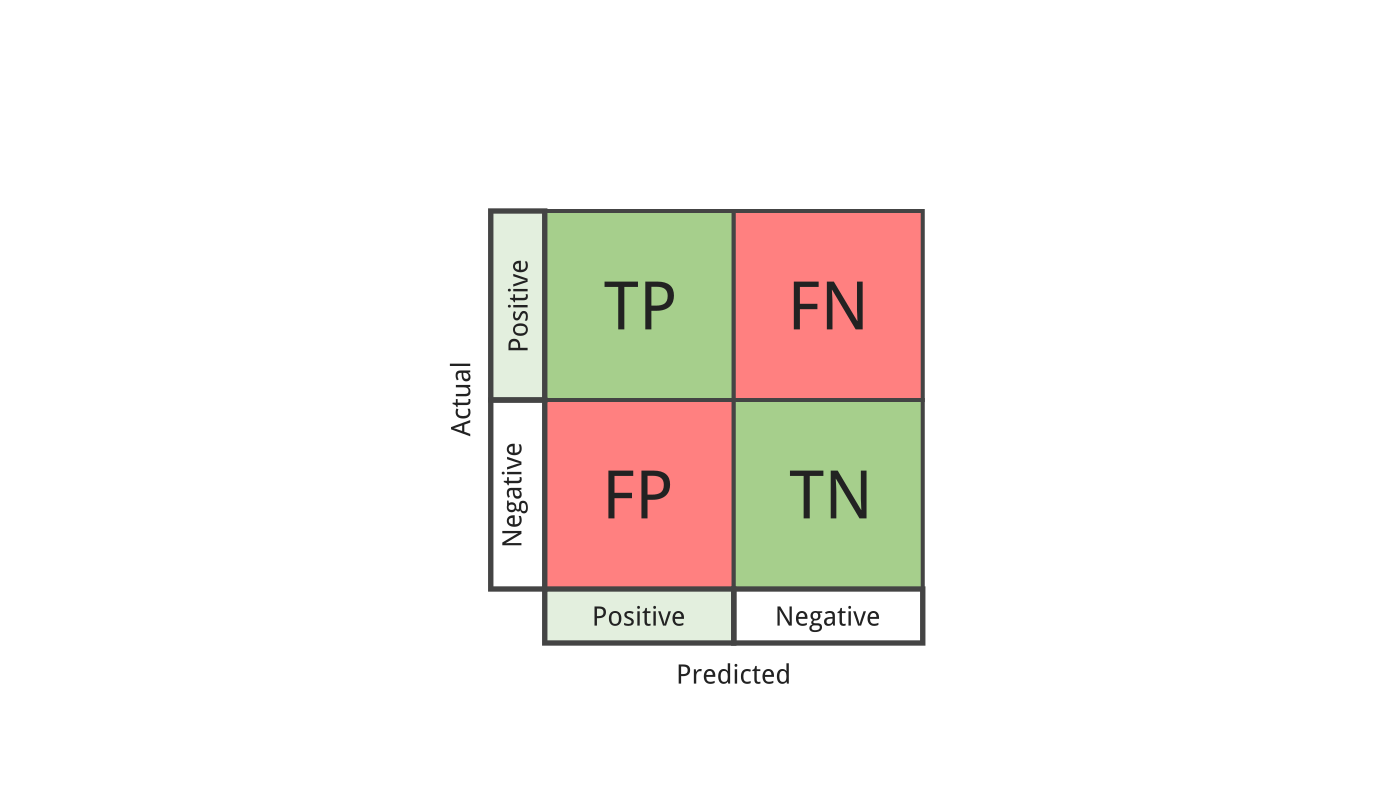

#### _TP (True Positive)_: when the actual is positive and we preditcted correctly
#### _TN (True Negative)_: when the actual is negative and we predicted correctly
#### _FN (False Negative)_: when the actual is negative and we predicted incorrectly
#### _FP (False Positive)_: when the actual is positive and we predicted incorrectly

# KNeighbors Classifier

### Validation with a random N

In [19]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_valid)
print(confusion_matrix(y_valid, y_pred))
print(classification_report(y_valid, y_pred))

[[77  4]
 [ 3  3]]
              precision    recall  f1-score   support

           0       0.96      0.95      0.96        81
           1       0.43      0.50      0.46         6

    accuracy                           0.92        87
   macro avg       0.70      0.73      0.71        87
weighted avg       0.93      0.92      0.92        87



The True Positive is **77** out of **81** and the True Negative is **3** out of **6**

Which results in an accuracy of **0.92**

In [20]:
f1_score(y_valid, y_pred, average='binary') 

0.4615384615384615

Which makes the **F1 score** equal to **0.46** for the positive class

### Finding best N by Cross Val score

In [21]:
neighbors = np.arange(1, 10)
y_list = []
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    y_pred = cross_val_score(knn, X_train, y_train, cv=10).mean()
    y_list.append(y_pred)
    if y_pred >= max(y_list):
        max_N = k
    
print(f"The best N is {max_N} with value {max(y_list)}")    


The best N is 1 with value 0.9244671781756182


### Validation with the best N

In [22]:
knn = KNeighborsClassifier(n_neighbors=1, algorithm = 'brute')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_valid)
print(confusion_matrix(y_valid, y_pred))
print(classification_report(y_valid, y_pred))

[[76  5]
 [ 0  6]]
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        81
           1       0.55      1.00      0.71         6

    accuracy                           0.94        87
   macro avg       0.77      0.97      0.84        87
weighted avg       0.97      0.94      0.95        87



The True Positive is **76** out of **81** and the True Negative is **6** out of **6**

Which results in an accuracy of **0.94**

In [23]:
f1_score(y_valid, y_pred, average='binary') 

0.7058823529411764

Which makes the **F1 score** equal to **0.71** for the positive class

# Logistic Regression Classifier

### Validation before tuning

In [24]:
lr = LogisticRegression(solver='lbfgs')
lr.fit(X_train, y_train)

LogisticRegression()

In [25]:
y_pred = lr.predict(X_valid)
print(confusion_matrix(y_valid, y_pred))
print(classification_report(y_valid, y_pred))

[[80  1]
 [ 6  0]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96        81
           1       0.00      0.00      0.00         6

    accuracy                           0.92        87
   macro avg       0.47      0.49      0.48        87
weighted avg       0.87      0.92      0.89        87



The True Positive is **80** out of **81** and the True Negative is **0** out of **6**


Which results in an accuracy of **0.92**

In [26]:
f1_score(y_valid, y_pred, average='binary') 

0.0

Which makes the **F1 score** equal to **0** for the positive class


### Tuning the hyperparameters

In [27]:
LR = LogisticRegression()
LRparam_grid = {
    'C': [0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['none','l1', 'l2'],
    'solver': ['lbfgs', 'liblinear']
}
LR_search = GridSearchCV(LR, param_grid = LRparam_grid, refit = True, verbose = 1, cv=7)

# fitting the model for grid search 
LR_search.fit(X_train , y_train)
LR_search.best_params_

paralist = []
paralist = list(LR_search.best_params_.values())

lr = LogisticRegression(C= paralist[0] , penalty= paralist[1], solver= paralist[2])
lr.fit(X_train, y_train)

Fitting 7 folds for each of 36 candidates, totalling 252 fits


LogisticRegression(C=1000, penalty='l1', solver='liblinear')

### Validation after tuning

In [28]:
y_pred = lr.predict(X_valid)
print(confusion_matrix(y_valid, y_pred))
print(classification_report(y_valid, y_pred))

[[80  1]
 [ 1  5]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        81
           1       0.83      0.83      0.83         6

    accuracy                           0.98        87
   macro avg       0.91      0.91      0.91        87
weighted avg       0.98      0.98      0.98        87



The True Positive is **80** out of **81** and the True Negative is **5** out of **6**


Which results in an accuracy of **0.98**

In [29]:
f1_score(y_valid, y_pred, average='binary') 

0.8333333333333334

Which makes the **F1 score** equal to **0.83** for the positive class


# Naïve Bayes Classifier

### Validation before tuning

In [30]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [31]:
y_pred = gnb.predict(X_valid)
print(confusion_matrix(y_valid, y_pred))
print(classification_report(y_valid, y_pred))

[[81  0]
 [ 4  2]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        81
           1       1.00      0.33      0.50         6

    accuracy                           0.95        87
   macro avg       0.98      0.67      0.74        87
weighted avg       0.96      0.95      0.94        87



The True Positive is **81** out of **81** and the True Negative is **2** out of **6**


Which results in an accuracy of **0.95**

In [32]:
f1_score(y_valid, y_pred, average='binary') 

0.5

Which makes the **F1 score** equal to **0.50** for the positive class


### Tuning the hyperparameters

In [33]:
nb_classifier = GaussianNB()

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier, param_grid = params_NB, verbose=1, scoring='accuracy') 
gs_NB.fit(X_train, y_train)

var_value = gs_NB.best_params_.get('var_smoothing')
gnb = GaussianNB(var_smoothing = var_value)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


### Validation after tuning

In [34]:
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_valid)
print(confusion_matrix(y_valid, y_pred))
print(classification_report(y_valid, y_pred))

[[78  3]
 [ 1  5]]
              precision    recall  f1-score   support

           0       0.99      0.96      0.97        81
           1       0.62      0.83      0.71         6

    accuracy                           0.95        87
   macro avg       0.81      0.90      0.84        87
weighted avg       0.96      0.95      0.96        87



The True Positive is **78** out of **81** and the True Negative is **5** out of **6**


Which results in an accuracy of **0.95**

In [35]:
f1_score(y_valid, y_pred, average='binary') 

0.7142857142857143

Which makes the **F1 score** equal to **0.71** for the positive class


# Decision Tree

### Validation before tuning

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

In [37]:
dtree = DecisionTreeClassifier(criterion = "entropy", random_state=3)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=3)

In [38]:
y_pred = dtree.predict(X_valid)
print(confusion_matrix(y_valid, y_pred))
print(classification_report(y_valid, y_pred))

[[77  4]
 [ 1  5]]
              precision    recall  f1-score   support

           0       0.99      0.95      0.97        81
           1       0.56      0.83      0.67         6

    accuracy                           0.94        87
   macro avg       0.77      0.89      0.82        87
weighted avg       0.96      0.94      0.95        87



In [39]:
f1_score(y_valid, y_pred, average='binary') 

0.6666666666666667

### Tuning the hyperparameters

In [40]:
LRparam_grid = {
    'max_depth': np.arange(1,15),
    'max_features': np.arange(1,15),
    'random_state': [3]
}
LR_search = GridSearchCV(dtree, param_grid = LRparam_grid, refit = True, verbose = 1, cv=7)
LR_search.fit(X_train , y_train)
LR_search.best_params_

paralist = []
paralist = list(LR_search.best_params_.values())

dtree = DecisionTreeClassifier(criterion = "entropy", max_depth= paralist[0], max_features =paralist[1], random_state=3)
dtree.fit(X_train, y_train)

Fitting 7 folds for each of 196 candidates, totalling 1372 fits


DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features=7,
                       random_state=3)

### Validation after tuning

In [41]:
y_pred = dtree.predict(X_valid)
print(confusion_matrix(y_valid, y_pred))
print(classification_report(y_valid, y_pred))

[[78  3]
 [ 0  6]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        81
           1       0.67      1.00      0.80         6

    accuracy                           0.97        87
   macro avg       0.83      0.98      0.89        87
weighted avg       0.98      0.97      0.97        87



In [42]:
f1_score(y_valid, y_pred, average='binary') 

0.8

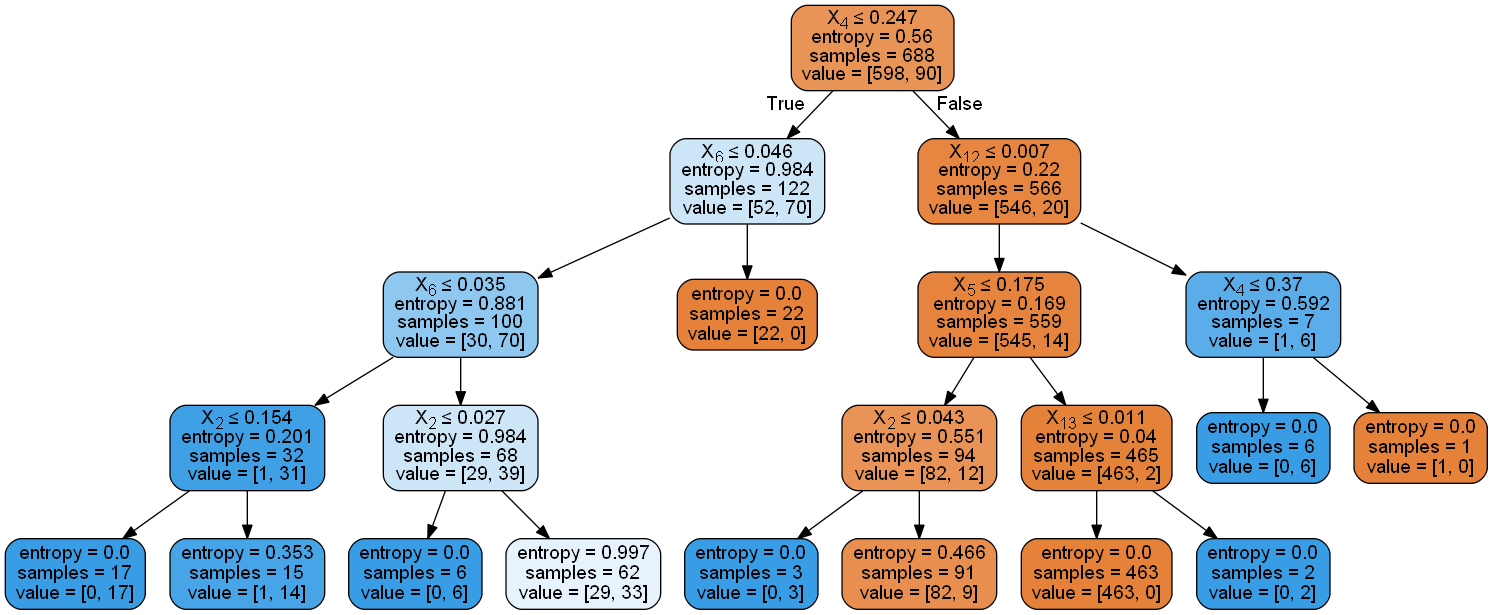

In [43]:
dot_data = StringIO()
export_graphviz(dtree, out_file = dot_data, rounded = True, filled = True, special_characters = True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png("dtree.png")
Image(graph.create_png())

# Support Vector Machine

### Validation before tuning

In [44]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [45]:
y_pred = svc.predict(X_valid)
print(confusion_matrix(y_valid, y_pred))
print(classification_report(y_valid, y_pred))

[[81  0]
 [ 6  0]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        81
           1       0.00      0.00      0.00         6

    accuracy                           0.93        87
   macro avg       0.47      0.50      0.48        87
weighted avg       0.87      0.93      0.90        87



In [46]:
f1_score(y_valid, y_pred, average='binary')

0.0

### Tuning the hyperparameters

In [47]:
LRparam_grid = {
    'kernel': ['poly','rbf','sigmoid'],
    'degree': np.arange(1,30),
    'random_state':[3],
    'C': np.arange(0,2),
    'gamma':['scale', 'auto']
}
LR_search = GridSearchCV(svc, param_grid = LRparam_grid, refit = True, verbose = 1, cv=4)
LR_search.fit(X_train , y_train)
LR_search.best_params_

paralist = []
paralist = list(LR_search.best_params_.values())

svc = SVC(C =paralist[0], degree= paralist[1], gamma=paralist[2], kernel = paralist[3], random_state=3)
svc.fit(X_train, y_train)

Fitting 4 folds for each of 348 candidates, totalling 1392 fits


SVC(C=1, degree=21, kernel='poly', random_state=3)

### Validation after tuning

In [48]:
y_pred = svc.predict(X_valid)
print(confusion_matrix(y_valid, y_pred))
print(classification_report(y_valid, y_pred))

[[79  2]
 [ 0  6]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        81
           1       0.75      1.00      0.86         6

    accuracy                           0.98        87
   macro avg       0.88      0.99      0.92        87
weighted avg       0.98      0.98      0.98        87



In [49]:
f1_score(y_valid, y_pred, average='binary')

0.8571428571428571

# Testing Algorithms


### Testing KNN

In [50]:
y_pred = knn.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[69  5]
 [ 3  9]]
              precision    recall  f1-score   support

           0       0.96      0.93      0.95        74
           1       0.64      0.75      0.69        12

    accuracy                           0.91        86
   macro avg       0.80      0.84      0.82        86
weighted avg       0.91      0.91      0.91        86



The True Positive is **69** out of **74** and the True Negative is **9** out of **12**


Which results in an accuracy of **0.91**

In [51]:
f1_score(y_test, y_pred, average='binary') 

0.6923076923076924

Which makes the **F1 score** equal to **0.69** for the positive class


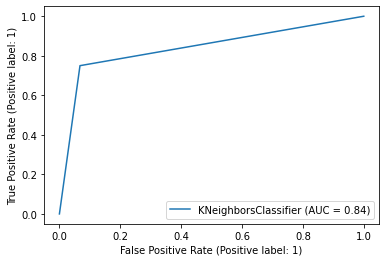

In [52]:
metrics.plot_roc_curve(knn, X_test, y_test)
plt.show()

In [53]:
roc_auc_score(y_test.to_numpy(), y_pred)

0.8412162162162162

### Testing LR

In [54]:
y_pred = lr.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[74  0]
 [ 4  8]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        74
           1       1.00      0.67      0.80        12

    accuracy                           0.95        86
   macro avg       0.97      0.83      0.89        86
weighted avg       0.96      0.95      0.95        86



The True Positive is **74** out of **74** and the True Negative is **8** out of **12**


Which results in an accuracy of **0.94**

In [55]:
f1_score(y_test, y_pred, average='binary') 

0.8

Which makes the **F1 score** equal to **0.76** for the positive class


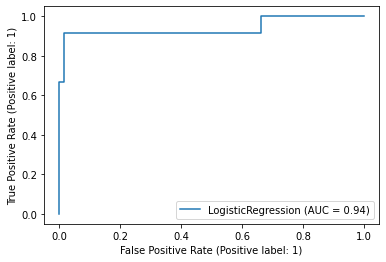

In [56]:
metrics.plot_roc_curve(lr, X_test, y_test)

In [57]:
roc_auc_score(y_test.to_numpy(), y_pred)

0.8333333333333333

### Testing GNB

In [58]:
y_pred = gnb.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[71  3]
 [ 2 10]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.97        74
           1       0.77      0.83      0.80        12

    accuracy                           0.94        86
   macro avg       0.87      0.90      0.88        86
weighted avg       0.94      0.94      0.94        86



The True Positive is **71** out of **74** and the True Negative is **10** out of **12**


Which results in an accuracy of **0.94**

In [59]:
f1_score(y_test, y_pred, average='binary') 

0.8

Which makes the **F1 score** equal to **0.80** for the positive class


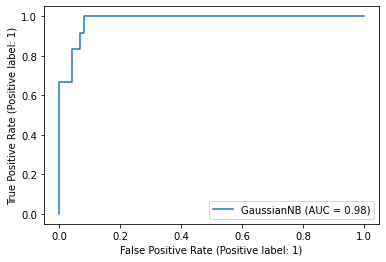

In [60]:
metrics.plot_roc_curve(gnb, X_test, y_test)

In [61]:
roc_auc_score(y_test.to_numpy(), y_pred)

0.8963963963963965

### Testing Decision Tree

In [62]:
y_pred = dtree.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[70  4]
 [ 2 10]]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        74
           1       0.71      0.83      0.77        12

    accuracy                           0.93        86
   macro avg       0.84      0.89      0.86        86
weighted avg       0.94      0.93      0.93        86



In [63]:
f1_score(y_test, y_pred, average='binary')

0.7692307692307692

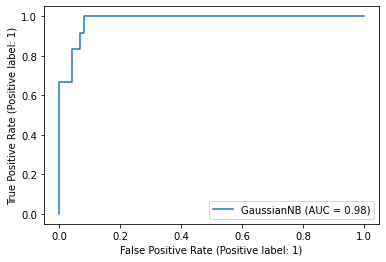

In [64]:
metrics.plot_roc_curve(gnb, X_test, y_test)

In [65]:
roc_auc_score(y_test.to_numpy(), y_pred)

0.8896396396396397

### Testing Support Vector Machine

In [66]:
y_pred = svc.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[72  2]
 [ 4  8]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        74
           1       0.80      0.67      0.73        12

    accuracy                           0.93        86
   macro avg       0.87      0.82      0.84        86
weighted avg       0.93      0.93      0.93        86



In [67]:
f1_score(y_test, y_pred, average='binary')

0.7272727272727272

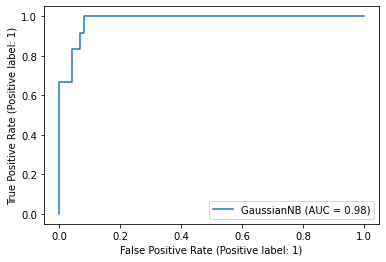

In [68]:
metrics.plot_roc_curve(gnb, X_test, y_test)

In [69]:
roc_auc_score(y_test.to_numpy(), y_pred)

0.8198198198198198